# WELCOME!

Welcome to "***Tree Types Prediction Project***".

In this project, you must perform EDA processes for implementing predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library) will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind classification models and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering using SQLite local database. 

At this point, in order to improve your skills of using SQL with Python, you are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of your models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *Evaluate your models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but you can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if you want.*



---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering with sqlite3 Module


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement KNN Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Implement SVM Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [ ]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import warnings
warnings.filterwarnings('ignore')

font_title = {'family': 'times new roman', 
              'color': 'darkred', 
              'weight': 'bold', 
              'size': 14}

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

#### *ii. Load Dataset*

In [ ]:
tree=pd.read_csv("../input/forest-cover-type-dataset/covtype.csv")
tree.head()

   **Features**
   
    Elevation - Elevation in meters
    Aspect - Aspect in degrees azimuth
    Slope - Slope in degrees
    Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
    Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
    Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
    Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
    Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
    Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
    Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
    Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
    Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
    Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

### `Wilderness_Area`
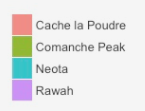

### `Cover_Type`
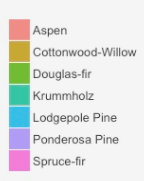

In [ ]:
tree.info()

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [ ]:
def reversed_dummies(df: pd.DataFrame, dummy_cols: list, new_header: str, prefix='_') ->'DataFrame':
    serial=df[dummy_cols].idxmax(axis=1).str.split(prefix).str[-1]
    return pd.concat([df.drop(dummy_cols,axis=1),pd.DataFrame(serial,columns=[new_header])],axis=1)

In [ ]:
tree.columns

In [ ]:
dummy_cols=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']
df=reversed_dummies(tree,dummy_cols,'Soil')
dummy_cols=['Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
df=reversed_dummies(df,dummy_cols,'Wilderness')
df.head()

In [ ]:
df.describe()

In [ ]:
# categorik verilerin istatistiksel analizi icin:
df.describe(include=['O'])

In [ ]:
# her columns in num of uniques

df.apply(lambda x: x.nunique())

In [ ]:
# Null percentages of each features

df.isnull().sum()*100/tree.shape[0]

In [ ]:
# Target Label

df.Cover_Type.unique() 

In [ ]:
# df.Cover_Type.value_counts(dropna=False).sort_index()
sns.countplot(x='Cover_Type',data=df);

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

In [ ]:
df.corr()["Cover_Type"].sort_values().plot.barh();

In [ ]:
print('Unique Values of Each Features:\n')
for i in df:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

**Summary Results :**
* "Elevation", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points" are continuous variables and their values vary.
* "Aspect" is also continuous and its values vary from 0 to 360. It has angular values.
* "Hillshade_3pm", "Hillshade_Noon", "Hillshade_3pm" are also continuos and their values vary from 0 to 255. This means that the values represent bitwise value. I concluded that the values are RGB color representation of the shadow at a particular time.
* Wilderness_Areas and Soil_Types are categorical (binary 1 or 0) data.

### Relationships and Correlations Between Features

* Wilderness - Soil
* Horizontal_Distance_To_Hydrology - Vertical_Distance_To_Hydrology
* Soil - Cover_Type
* Wilderness - Cover_Type
* Elevation - Cover_Type
* Slope - Cover_Type
* Horizontal_Distance_To_Roadways - Cover_Type
* Horizontal_Distance_To_Fire_Points - Cover_Type

In [ ]:
# sns.pairplot(df);

> **Wilderness - Soil**

In [ ]:
df.groupby(['Wilderness']).Soil.describe(include=['O'])

> **Horizontal_Distance_To_Hydrology - Vertical_Distance_To_Hydrology**

In [ ]:
plt.figure(figsize=(25,25))
sns.scatterplot(x='Horizontal_Distance_To_Hydrology',y='Vertical_Distance_To_Hydrology',data=df, hue='Wilderness');

> **Soil - Cover_Type**

In [ ]:
df.Soil.value_counts(dropna=False)

In [ ]:
plt.figure(figsize=(15,11))
sns.countplot(y='Soil',data=df.sort_values(by=['Soil'], key=lambda col: col.str.extract('(\d+)')[0].astype('float')));

> **Wilderness - Cover_Type**

In [ ]:
df.Wilderness.value_counts(dropna=False)

In [ ]:
# plt.figure(figsize=(20,10))
sns.countplot(y='Wilderness',data=df);

In [ ]:
df.groupby(['Cover_Type', 'Wilderness']).Elevation.describe()

> **Elevation - Cover_Type**

In [ ]:
df[["Elevation", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

In [ ]:
sns.factorplot(x="Cover_Type", y ="Elevation", data=df, kind="bar", palette='RdBu_r',size=5);

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette="coolwarm");

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Wilderness', y='Elevation', data=df, palette="coolwarm");

In [ ]:
plt.figure(figsize=(20,25))
sns.boxplot(y='Soil', x='Elevation', data=df.sort_values(by=['Soil'], key=lambda col: col.str.extract('(\d+)')[0].astype('float')), orient="h",palette="coolwarm");

In [ ]:
# plt.figure(figsize=(15,15))
sns.displot(df['Elevation'].dropna(), kde=True, height= 6, color='darkred', bins=20);

> **Slope - Cover_Type**

In [ ]:
df[["Slope", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

In [ ]:
df.groupby(['Cover_Type', 'Wilderness']).Slope.describe()

In [ ]:
sns.factorplot(x="Cover_Type", y ="Slope", data=df, kind="bar", palette='RdBu_r',size=5);

In [ ]:
sns.displot(df['Slope'].dropna(), kde=True,height= 6,color='darkred',bins=20);

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Slope', data=df, palette="coolwarm");

> **Horizontal_Distance_To_Roadways - Cover_Type**

In [ ]:
df[["Horizontal_Distance_To_Roadways", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

In [ ]:
sns.factorplot(x="Cover_Type", y ="Horizontal_Distance_To_Roadways", data=df, kind="bar", palette='RdBu_r',size=5);

In [ ]:
sns.displot(df['Horizontal_Distance_To_Roadways'].dropna(), kde=True,height= 6,color='darkred',bins=20);

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways', data=df, palette="coolwarm");

> **Horizontal_Distance_To_Fire_Points - Cover_Type**

In [ ]:
df[["Horizontal_Distance_To_Fire_Points", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

In [ ]:
sns.factorplot(x="Cover_Type", y ="Horizontal_Distance_To_Fire_Points", data=df, kind="bar", palette='RdBu_r',size=5);

In [ ]:
sns.displot(df['Horizontal_Distance_To_Fire_Points'].dropna(), kde=True,height= 6,color='darkred',bins=20);

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', data=df, palette="coolwarm");

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [ ]:
df.isnull().sum().any()

In [ ]:
# numeric = []
# for col in df.columns:
#     if df[col].nunique() > 7 : numeric.append(col)
# print(numeric)

In [ ]:
# features = df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

In [ ]:
df.shape

In [ ]:
df.corr()["Cover_Type"].sort_values(ascending=False)

In [ ]:
df.columns

In [ ]:
def col_plot(df,col_name):
    plt.figure(figsize=(15,6))
    
    plt.subplot(141) # 1 satir x 4 sutun dan olusan ax in 1. sutununda calis
    plt.hist(df[col_name], bins = 20)
    f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
    
    # üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
    plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='red')
    plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='red')
    plt.xlabel(col_name)
    plt.tight_layout
    plt.xlabel("Histogram ±3z")
    plt.ylabel(col_name)

    plt.subplot(142)
    plt.boxplot(df[col_name]) # IQR katsayisi, defaultu 1.5
    plt.xlabel("IQR=1.5")

    plt.subplot(143)
    plt.boxplot(df[col_name].apply(f), whis = 2.5)
    plt.xlabel("ROOT SQUARE - IQR=2.5")

    plt.subplot(144)
    plt.boxplot(np.log(df[col_name]+0.1), whis = 2.5)
    plt.xlabel("LOGARITMIC - IQR=2.5")
    plt.show()

In [ ]:
for i in df.columns[:-3]:
    col_plot(df,i)

In [ ]:
from scipy.stats.mstats import winsorize

def plot_winsorize(df,col_name,up=0.1,down=0):
    plt.figure(figsize = (15, 6))

    winsor=winsorize(df[col_name], (down,up))
    logr=np.log(df[col_name]+0.1)

    plt.subplot(141)
    plt.hist(winsor, bins = 22)
    plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
    plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
    plt.xlabel('Winsorize_Histogram')
    plt.ylabel(col_name)
    plt.tight_layout

    plt.subplot(142)
    plt.boxplot(winsor, whis = 1.5)
    plt.xlabel('Winsorize - IQR:1.5')
    
    plt.subplot(143)
    plt.hist(logr, bins=22)
    plt.axvline(x=logr.mean()+3*logr.std(),color='red')
    plt.axvline(x=logr.mean()-3*logr.std(),color='red')
    plt.xlabel('Logr_col_name')

    plt.subplot(144)
    plt.boxplot(logr, whis = 1.5)
    plt.xlabel("Logaritmic - IQR=1.5")
    plt.show()    


In [ ]:

for i in df.columns[:-3]:
    plot_winsorize(df,i)

In [ ]:
features=['Elevation', 
#            'Aspect', # angle
           'Slope', 
           'Horizontal_Distance_To_Hydrology',
           'Vertical_Distance_To_Hydrology',
           'Horizontal_Distance_To_Roadways', # not expected normal distribution
#            'Hillshade_9am', # bitwise
#            'Hillshade_Noon',
#            'Hillshade_3pm',
           'Horizontal_Distance_To_Fire_Points']

In [ ]:
df_winsorised=df.copy()
for i in features:
    df_winsorised[i]=winsorize(df_winsorised[i], (0,0.1))

In [ ]:
df_log=df.copy()
for i in features:
    df_log[i]=np.log(df_log[i])

In [ ]:
df_root=df.copy()
f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
for i in features:
    df_root[i]=df_root[i].apply(f)

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection in *EDA Project (Auto Scout)* are given below.

In [ ]:
from numpy import percentile
from scipy.stats import zscore
from scipy import stats

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile)

In [ ]:
from scipy.stats import zscore
from scipy import stats

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
   
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    
    plt.subplot(1,3,1)
    plt.axvline(x=df[col].mean() + z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.axvline(x=df[col].mean() - z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.show()
    
    return z_score_inspect

In [ ]:
def detect_outliers(df:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
print("Number of Outliers for k*IQR\n")
k=3

total=0
for col in features:
    if detect_outliers(df, col)[2] > 0:
        outliers=detect_outliers(df, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

In [ ]:
k=2
print(f"Number of Outliers for {k}*IQR after Winsorised\n")

total=0
for col in features:
    if detect_outliers(df_winsorised, col)[2] > 0:
        outliers=detect_outliers(df_winsorised, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

In [ ]:
k=3
print(f"Number of Outliers for {k}*IQR after Logarithmed\n")

total=0
for col in features:
    if detect_outliers(df_log, col)[2] > 0:
        outliers=detect_outliers(df_log, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

In [ ]:
k=2.2
print(f"Number of Outliers for {k}*IQR after Root Square\n")

total=0
for col in features:
    if detect_outliers(df_root, col)[2] > 0:
        outliers=detect_outliers(df_root, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

In [ ]:
z_scores=[]
for i in df.columns[:-3]:
    z_scores.append(outlier_inspect(df,i)[2])

In [ ]:
z_scores

**Yukaridaki grefige gore Datanin  %99.7 sini kapsayan aralik**

In [ ]:
df_z=df.copy()
for i in features:
    down_limit= df_z[i].mean() - z_scores[df_z.columns.get_loc(i)]*df_z[i].std()
    upper_limit= df_z[i].mean() + z_scores[df_z.columns.get_loc(i)]*df_z[i].std()
    condition= (down_limit < df_z[i]) & (df_z[i] < upper_limit)
    df_z=df_z[condition]

In [ ]:
print('Number of Outliers:',len(df)-len(df_z))

In [ ]:
df_3z=df.copy()
for i in features:
    down_limit= df_3z[i].mean() - (3*df_3z[i].std())
    upper_limit= df_3z[i].mean() + (3*df_3z[i].std())
    condition= (down_limit < df_3z[i]) & (df_3z[i] < upper_limit)
    df_3z=df_3z[condition]

In [ ]:
print('Number of Outliers:',len(df)-len(df_3z))

#### *ii. Drop Outliers*

* We used different outlier detection methods. As a result, we decided to determine outliers with winsorize.

In [ ]:
k=2
for i in features:
    lower,upper,_=detect_outliers(df_winsorised,i,k)
    df_winsorised=df_winsorised[(df_winsorised[i]>lower)&(df_winsorised[i]<upper)]

In [ ]:
df=df_winsorised
df.shape

In [ ]:
# After dropping rows, you can run reset_index()
df = df.reset_index(drop=True)

In [ ]:
df.Cover_Type.value_counts(dropna=False).sort_index()

In [ ]:
sns.countplot(x='Cover_Type',data=df);

In [ ]:
def perc_col(df,col):
    print(f'Percentage of df["{col}"] Unique Values:\n')
    for i in sorted(df[col].unique()):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))

In [ ]:
perc_col(df,'Cover_Type')

* Target Label is unbalanced. 

In [ ]:
plt.figure(figsize=(25,13))
sns.heatmap(df.corr(),square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show()

In [ ]:
df=pd.get_dummies(df)
df.head(2)

In [ ]:
df.to_csv("covtype_EDA.csv", index = False)

## Feature Engineering with *sqlite3* Library
Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Lastly, I will drop unnecessary columns ``'Hillshade_3pm', 'Soil_Type7', 'Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type21', 'Soil_Type25', 'Soil_Type28', 'Soil_Type36', 'Soil_Type37'``) that I conclued previously.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [ ]:
import sqlite3

Creation a sqlite database ("tree_database") and transferring dataframe(tree1) from python into database table (covtype2)

In [ ]:
# Creation of the connection and importing dataframe into database.

# with sqlite3.connect("tree_database.db") as cnnct:
#     tree1.to_sql("covtype2", cnnct, if_exists = "replace")

In [ ]:
# create a database named as tree_database.db
cnnct = sqlite3.connect('tree_database.db')  

with cnnct: 
    # create a table named as covtype in tree_database database
    df.to_sql("covtype", cnnct, if_exists = "replace")

In [ ]:
query1 = """SELECT *,
(Horizontal_Distance_To_Hydrology*Horizontal_Distance_To_Hydrology)+(Vertical_Distance_To_Hydrology*Vertical_Distance_To_Hydrology) as Square_Hypo_Distance,
(Horizontal_Distance_To_Hydrology + Horizontal_Distance_To_Roadways)/2 as Average_Dist_Road_Hydro, 
(Elevation + Vertical_Distance_To_Hydrology) /2 as Average_Elevation_Hydro
FROM covtype;"""

In [ ]:
query2 = """SELECT Elevation, Aspect, Slope, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, 
Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3,
Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6,
Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type16, Soil_Type17, 
Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type22, Soil_Type23, Soil_Type24, 
Soil_Type26, Soil_Type27, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, 
Soil_Type34, Soil_Type35, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type,
Square_Hypo_Distance, Average_Dist_Road_Hydro, Average_Elevation_Hydro
FROM covtype;"""

In [ ]:
# connect tree_database.db
cnnct = sqlite3.connect('tree_database.db')  

with cnnct: 
    # create a table named as covtype in tree_database database
    df1 = pd.read_sql_query(query1, cnnct)  # transforming and exporting to df1
    df1.to_sql("covtype", cnnct, if_exists = "replace")  # importing again to dropping columns
    df2 = pd.read_sql_query(query2, cnnct)  # exporting table to df2

In [ ]:
df2.to_csv("covtype_FE.csv", index = False)

***
***

# Modelling (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from statsmodels.formula.api import ols
from scipy.stats import zscore
from scipy import stats

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

from sklearn.preprocessing import LabelEncoder, scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
import warnings
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [ ]:
df = pd.read_csv("covtype_EDA.csv")
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

## Undersampling
* Data is large and unbalanced. Oversampling has many challanges for this data. So we use `UNDERSAMPLING` technique. We choose a sample according to Cover Type 4 that has the least row counts(2369).

In [ ]:
df.Cover_Type.value_counts()

In [ ]:
row_num=df.Cover_Type.value_counts().min()

In [ ]:
df2=pd.DataFrame()

for i in df.Cover_Type.unique():
    df2=pd.concat([df2,df[df.Cover_Type==i].sample(row_num)])
    

In [ ]:
df2.Cover_Type.value_counts()

In [ ]:
X = df2.drop("Cover_Type", axis = 1)
y = df2["Cover_Type"]

### Standarization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# ``1.XGBoost Classifer``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
xgb= XGBClassifier()
xgb.fit(X_train , y_train)

In [ ]:
y_pred = xgb.predict(X_test)

**Evaluate the performance**

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

**Tunning XGBOOST**

In [ ]:
xgb_params = {"n_estimators": [50,300,500],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,9,17],
             "learning_rate":[0.1,0.01,0.3]}

In [ ]:
# xgb_grid= GridSearchCV(xgb, xgb_params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
# xgb_grid= RandomizedSearchCV(xgb, xgb_params, cv = 5, 
#                             n_iter=10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
# xgb_grid.best_params_

In [ ]:
xgb_tuned = XGBClassifier(learning_rate= 0.3, 
                                max_depth= 15, 
                                n_estimators= 200, 
                                subsample= 0.7).fit(X_train, y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_f1_score = f1_score(y_test, y_pred, average='weighted')
xgb_recall = recall_score(y_test, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

**`Cross Validation Scores`**

In [ ]:
# xgb_accuracy = cross_val_score(xgb_tuned, X_test, y_test,cv = 10).mean()
# xgb_f1_score = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
# xgb_recall = cross_val_score(xgb_tuned, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
# print('xgb_accuracy:',xgb_accuracy,
#       '\nxgb_f1_score:',xgb_f1_score,
#       '\nxgb_recall:',xgb_recall)

**Visualization of Confusion Matrix with Table**

In [ ]:
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split as tts
# from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

In [ ]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``2.Random Forest Classifier``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

In [ ]:
y_pred = rfc.predict(X_test)

**Evaluate the performance**

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

In [ ]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

**`Cross Validation Scores`**

In [ ]:
# rfc_accuracy = cross_val_score(rfc, X_test, y_test,cv = 10).mean()
# rfc_f1_score = cross_val_score(rfc, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
# rfc_recall = cross_val_score(rfc, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
# print('rfc_accuracy:',rfc_accuracy,
#       '\nrfc_f1_score:',rfc_f1_score,
#       '\nrfc_recall:',rfc_recall)

**RF Tunning**

In [ ]:
# rfc_params = {"n_estimators":[50, 100, 300],
#               "max_depth":[3,5,7],
#               "max_features": [2,4,6,8],
#               "min_samples_split": [2,4,6]}

In [ ]:
# rfc_grid = GridSearchCV(rfc, rfc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [ ]:
# rfc_grid.best_params_

In [ ]:
# rfc_tuned = RandomForestClassifier(max_depth = 7,             
#                                   max_features = 8, 
#                                   min_samples_split = 2, 
#                                   n_estimators = 1000).fit(X_train, y_train)

In [ ]:
# y_pred = rfc_tuned.predict(X_test)
# print(classification_report(y_test, y_pred))

* default degerlerle model daha basarili cikti.

**Visualization of Confusion Matrix with Table**

In [ ]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rfc)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

In [ ]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``3.KNeighborsClassifer``

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

In [ ]:
y_pred = knn.predict(X_test)

**Visualize Accuracies of Train & Test Data by Different k`s**

In [ ]:
neighbors = range(1,8,2) # k nin tek sayi olmasi beklenir.
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

**Find Optimum K Value with Elbow Method**

In [ ]:
error_rate = []
# Her bir error rate icin olusan k degeri bu listeye atilacak
# k nin tek sayi olmasi beklenir.
# Will take some time
for i in range(1,8,2):
    
    model = KNeighborsClassifier(n_neighbors=i) # k= i
    model.fit(X_train,y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test)) 
    

print('Optimum K_Value: ',error_rate.index(min(error_rate))+1)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,8,2),
         error_rate,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

**Tunning KNN with GridSearchCV**

In [ ]:
# knn = KNeighborsClassifier()
# knn_params = {"n_neighbors": range(1,8,2)} # k tek sayi olmali

# knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [ ]:
# knn_cv_model.best_params_

In [ ]:
knn_tuned= KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

**Evaluate the Performance**

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_f1_score = f1_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
print('knn_accuracy:',knn_accuracy,
      '\nknn_f1_score:',knn_f1_score,
      '\nknn_recall:',knn_recall)

**Visualization of Confusion Matrix with Table**

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(knn)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

In [ ]:
# Alternative
# from sklearn.metrics import classification_report,confusion_matrix
# sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label');

**Visualization of Confusion Matrix with Countplot**

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(knn)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``4.Decision Tree Classifier``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

**Evaluate the Performance**

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

In [ ]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_f1_score = f1_score(y_test, y_pred, average='weighted')
dt_recall = recall_score(y_test, y_pred, average='weighted')
print('dt_accuracy:',dt_accuracy,
      '\ndt_f1_score:',dt_f1_score,
      '\ndt_recall:',dt_recall)

**Visualization of Confusion Matrix with Table**

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(dt)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

In [ ]:
visualizer = ClassPredictionError(dt)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

# ``5. Support Vector Machine``
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

**Evaluate the Performance**

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

In [ ]:
svm_accuracy = accuracy_score(y_test, y_pred)
svm_f1_score = f1_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
print('svm_accuracy:',svm_accuracy,
      '\nsvm_f1_score:',svm_f1_score,
      '\nsvm_recall:',svm_recall)

**Visualization of Confusion Matrix with Table**

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(svm)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show();

**Visualization of Confusion Matrix with Countplot**

In [ ]:
visualizer = ClassPredictionError(svm)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

**Visualization of Classification Report**

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(svm, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

**Tunning SVM**

* if C=1, soft margin
* if C=1000, hard margin
* C, margine yakinlik veya uzakligina gore ceza verir.
* Gamma buyurse daha kompleks siniflandirici haline gelir ve overfitinge gidebilir.
* rbf kullanilacaksa C ve Gamma optimize edilmelidir. Ozellikle Gamma !
* Gamma buyukse, C onemsiz hale gelir.
* 0.0001 < Gamma < 10  
* 0.1 < C < 100

In [ ]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1,0.1,0.01,0.001,0.0001], 
#               'kernel': ['rbf']} 

In [ ]:
# grid_svc = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
# grid_svc.fit(X_train,y_train)
# grid_svc.best_params_

In [ ]:
# y_pred = grid_svc.predict(X_test)
# print(classification_report(y_test, y_pred))

### `Comparison of Accuracies & F1 Scores & Recall`
So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

In [ ]:
compare = pd.DataFrame({"Model": ["Random Forest", 
                                  "XGBoost",
#                                   "Logistic Regression",
#                                   'Naive Bayes',
#                                   'Ada Boosting',
                                  'Support Vector Machine', 
                                  "Decision Tree",
                                  "K-Nearest Neighbor",
                                 ],
                        "Accuracy": [rfc_accuracy, 
                                     xgb_accuracy, 
#                                      log_accuracy, 
#                                      nb_accuracy,
#                                      ada_accuracy, 
                                     svm_accuracy,
                                     dt_accuracy,
                                     knn_accuracy,
                                     ],
                        "F1 Score": [rfc_f1_score, 
                                     xgb_f1_score, 
#                                      log_f1_score, 
#                                      nb_f1_score, 
#                                      ada_f1_score, 
                                     svm_f1_score, 
                                     dt_f1_score,
                                     knn_f1_score,
                                    ],
                        "Recall": [rfc_recall, 
                                   xgb_recall, 
#                                    log_recall, 
#                                    nb_recall,
#                                    ada_recall, 
                                   svm_recall,
                                   dt_recall,
                                   knn_recall,
                                  ]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    
plt.subplot(311)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(312)
compare = compare.sort_values(by="F1 Score", ascending=False)
ax=sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

plt.subplot(313)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

### Conclusion
* Finally we trained 5 different Classification models and we got the best F1 Score,Accuracy and Recall of 0.88 for XGBoost Classifier. Now we will train the model with all dataset.

**Training the Model with All Dataset**

In [ ]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

xgb_tuned = XGBClassifier(learning_rate= 0.3, 
                                max_depth= 15, 
                                n_estimators= 200, 
                                subsample= 0.7).fit(X, y)

In [ ]:
y_pred = xgb_tuned.predict(X)
print(classification_report(y, y_pred))

In [ ]:
xgb_accuracy = accuracy_score(y, y_pred)
xgb_f1_score = f1_score(y, y_pred, average='weighted')
xgb_recall = recall_score(y, y_pred, average='weighted')
print('xgb_accuracy:',xgb_accuracy,
      '\nxgb_f1_score:',xgb_f1_score,
      '\nxgb_recall:',xgb_recall)

**Saving Model**

In [ ]:
import pickle
pickle.dump(xgb_tuned,open("model","wb"))
xgb_model = pickle.load(open("model","rb"))

**Make a Prediction**

In [ ]:
input={  'Elevation': 3056,
         'Aspect': 272,
         'Slope': 6,
         'Horizontal_Distance_To_Hydrology':319,
         'Vertical_Distance_To_Hydrology': 60,
         'Horizontal_Distance_To_Roadways': 1642,
         'Hillshade_9am':204,
         'Hillshade_Noon':242,
         'Hillshade_3pm':176,
         'Horizontal_Distance_To_Fire_Points':1591,
         'Soil_Type1': 0,
         'Soil_Type10':0,
         'Soil_Type11':0,
         'Soil_Type12':0,
         'Soil_Type13':0,
         'Soil_Type14':0,
         'Soil_Type16':0,
         'Soil_Type17':0,
         'Soil_Type18':0,
         'Soil_Type19':0,
         'Soil_Type2':0,
         'Soil_Type20':0,
         'Soil_Type21':0,
         'Soil_Type22':0,
         'Soil_Type23':1,
         'Soil_Type24':0,
         'Soil_Type25':0,
         'Soil_Type26':0,
         'Soil_Type27':0,
         'Soil_Type28':0,
         'Soil_Type29':0,
         'Soil_Type3':0,
         'Soil_Type30':0,
         'Soil_Type31':0,
         'Soil_Type32':0,
         'Soil_Type33':0,
         'Soil_Type34':0,
         'Soil_Type35':0,
         'Soil_Type36':0,
         'Soil_Type37':0,
         'Soil_Type38':0,
         'Soil_Type39':0,
         'Soil_Type4':0,
         'Soil_Type40':0,
         'Soil_Type5':0,
         'Soil_Type6':0,
         'Soil_Type7':0,
         'Soil_Type8':0,
         'Soil_Type9':0,
         'Wilderness_Area1':0,
         'Wilderness_Area2':0,
         'Wilderness_Area3':1,
         'Wilderness_Area4':0}

In [ ]:
xgb_model.predict(input)